In [1]:
import pandas as pd

In [3]:
Swiggy_Data = pd.read_csv('Swiggy chennai dataset.csv')

In [4]:
Swiggy_Data

,city,subcity,restaurant,rating,rating count,cost,cuisine,menu,item,price,veg_or_non_veg
0,Chennai,Poonamallee,LASSI AND SOUP CORNER,4.1,Too Few Ratings,200,Juices,Falooda,Regular Falooda,100.0,Veg
1,Chennai,Poonamallee,LASSI AND SOUP CORNER,4.1,Too Few Ratings,200,Juices,Falooda,Vanilla Falooda,110.0,Veg
2,Chennai,Poonamallee,LASSI AND SOUP CORNER,4.1,Too Few Ratings,200,Juices,Falooda,Strawberry Falooda,110.0,Veg
3,Chennai,Poonamallee,LASSI AND SOUP CORNER,4.1,Too Few Ratings,200,Juices,Falooda,Chocolate Falooda,130.0,Veg
4,Chennai,Poonamallee,LASSI AND SOUP CORNER,4.1,Too Few Ratings,200,Juices,Falooda,Butterscotch Falooda,130.0,Veg
...,...,...,...,...,...,...,...,...,...,...,...
162515,Chennai,Purasawalkam,Jain Food Service Chennai,2.8,20+ ratings,400,Thalis,North Indian,Poha,130.0,Veg
162516,Chennai,Purasawalkam,Jain Food Service Chennai,2.8,20+ ratings,400,Thalis,North Indian,Upma,108.0,Veg
162517,Chennai,Purasawalkam,Jain Food Service Chennai,2.8,20+ ratings,400,Thalis,North Indian,North India Thali,175.0,Veg
162518,Chennai,Purasawalkam,Jain Food Service Chennai,2.8,20+ ratings,400,Thalis,North Indian,Aloo Parathas,130.0,Veg


In [5]:
Swiggy_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162520 entries, 0 to 162519
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   city            162520 non-null  object 
 1   subcity         162520 non-null  object 
 2   restaurant      162520 non-null  object 
 3   rating          162520 non-null  float64
 4   rating count    162520 non-null  object 
 5   cost            162520 non-null  int64  
 6   cuisine         162520 non-null  object 
 7   menu            162520 non-null  object 
 8   item            162520 non-null  object 
 9   price           4949 non-null    float64
 10  veg_or_non_veg  162520 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 13.6+ MB


In [ ]:
#Q-1: Which are the top 5 most popular cuisines based on the number of menu items listed?

In [6]:
# Calculate the top 5 most popular cuisines based on the number of menu items listed
top_cuisines = Swiggy_Data['cuisine'].value_counts().head(5)

# Display the result
print("Top 5 most popular cuisines based on the number of menu items listed:")
print(top_cuisines)

Top 5 most popular cuisines based on the number of menu items listed:
cuisine
South Indian                 8051
North Indian,Chinese         6341
Indian                       6210
South Indian,North Indian    5618
Biryani,Chinese              5412
Name: count, dtype: int64


In [ ]:
#Q-2: Which subcity in Chennai has the most restaurants listed, and how does it compare with others?

In [7]:
# Find the subcity with the most restaurants listed
subcity_counts = Swiggy_Data['subcity'].value_counts()
top_subcity = subcity_counts.idxmax()
top_subcity_count = subcity_counts.max()

# Display the top subcity and its count, along with the top 5 subcities
print(f"The subcity with the most restaurants listed is: {top_subcity} ({top_subcity_count} restaurants).")
print("\nTop 5 subcities with the most restaurants listed:")
print(subcity_counts.head(5))

The subcity with the most restaurants listed is: Annanagar (8236 restaurants).

Top 5 subcities with the most restaurants listed:
subcity
Annanagar        8236
Perambur         7596
OMR Perungudi    7201
Vadapalani       7152
Urapakkam        7110
Name: count, dtype: int64


In [ ]:
#Q-3: What is the average price of food items across different cuisines? Are there specific cuisines that are generally more expensive?

In [8]:
# Filter rows where price is not null to focus on items with valid prices
valid_prices = Swiggy_Data[Swiggy_Data['price'].notnull()]

# Group by 'cuisine' and calculate the average price for each cuisine
average_price_per_cuisine = valid_prices.groupby('cuisine')['price'].mean().sort_values(ascending=False)

# Display the top 5 cuisines with the highest average price
print("Top 5 cuisines with the highest average price:")
print(average_price_per_cuisine.head(5))

# Display the overall average price across all cuisines
overall_average_price = valid_prices['price'].mean()
print(f"\nOverall average price of food items: {overall_average_price:.2f}")

Top 5 cuisines with the highest average price:
cuisine
Desserts            633.442623
Bakery              555.408378
Bakery,Desserts     515.689655
Bakery,Snacks       311.327586
Fast Food,Salads    300.752632
Name: price, dtype: float64

Overall average price of food items: 181.82


In [ ]:
#Q-4: What is the proportion of vegetarian vs. non-vegetarian items in the dataset? Which type has more variety?

In [9]:
# Count the number of vegetarian and non-vegetarian items
veg_nonveg_counts = Swiggy_Data['veg_or_non_veg'].value_counts()

# Calculate the proportion of each type
veg_nonveg_proportions = (veg_nonveg_counts / veg_nonveg_counts.sum()) * 100

# Identify which type has more variety
more_variety = veg_nonveg_counts.idxmax()

# Display the results
print("Proportion of Vegetarian vs. Non-Vegetarian items:")
print(veg_nonveg_proportions)

print(f"\nThe type with more variety is: {more_variety} ({veg_nonveg_counts[more_variety]} items).")


Proportion of Vegetarian vs. Non-Vegetarian items:
veg_or_non_veg
Veg        59.518213
Non-veg    40.481787
Name: count, dtype: float64

The type with more variety is: Veg (96729 items).


In [ ]:
#Q-5: How are the ratings distributed across restaurants? Are there any patterns or clusters of high or low ratings?

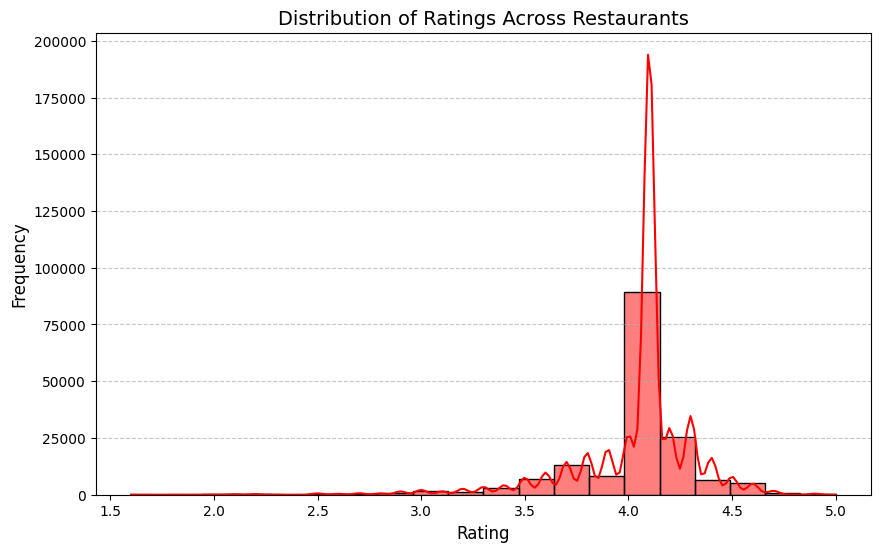

Rating Statistics:
count    162520.000000
mean          4.040952
std           0.297419
min           1.600000
25%           4.000000
50%           4.100000
75%           4.100000
max           5.000000
Name: rating, dtype: float64


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter valid ratings (ensure they are numeric)
valid_ratings = Swiggy_Data['rating'][Swiggy_Data['rating'].notnull()]

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(valid_ratings, bins=20, kde=True, color='red', edgecolor='black')
plt.title('Distribution of Ratings Across Restaurants', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display basic statistics for the ratings
rating_statistics = valid_ratings.describe()
print("Rating Statistics:")
print(rating_statistics)